# Week 9

## Unsupervised Learning
### K-Means Examples

**Task 1.** Load por,perm,rocktype data from por_perm_rocktype.txt


**Task 2.** Use kMeans to group/cluster the data (never use the word 'classify') 


**Task 3.** Check the accuracy of clustering

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt 
xc=np.loadtxt('por_perm_rocktype.txt', delimiter=',')  
xc

# rocktype is provided to check the efficacy of the clustering method

array([[ 4.28557953e+00,  2.01411174e+02,  3.00000000e+00],
       [ 1.04343394e+01,  1.52011036e+02,  2.00000000e+00],
       [ 7.31194531e+00,  1.32642794e+02,  0.00000000e+00],
       [ 8.58339591e+00,  1.95630052e+02,  2.00000000e+00],
       [ 1.00475429e+01,  1.72075272e+02,  2.00000000e+00],
       [ 2.06055590e+00,  3.88681960e+01,  1.00000000e+00],
       [ 8.51702777e+00,  1.97666476e+02,  2.00000000e+00],
       [ 6.64100614e+00,  1.14140114e+02,  0.00000000e+00],
       [ 8.08455670e+00,  1.82455699e+02,  2.00000000e+00],
       [ 6.82407278e+00,  1.31324535e+02,  0.00000000e+00],
       [ 4.40725893e+00,  1.96740656e+02,  3.00000000e+00],
       [ 6.90071699e+00,  1.25040894e+02,  0.00000000e+00],
       [ 8.95148431e+00,  1.79125100e+02,  2.00000000e+00],
       [ 8.69625011e+00,  1.53817397e+02,  2.00000000e+00],
       [ 4.86227427e+00,  1.96383666e+02,  3.00000000e+00],
       [ 7.21659266e+00,  1.00560263e+02,  0.00000000e+00],
       [ 1.04866831e+01,  1.58717202e+02

Text(0, 0.5, 'perm, md')

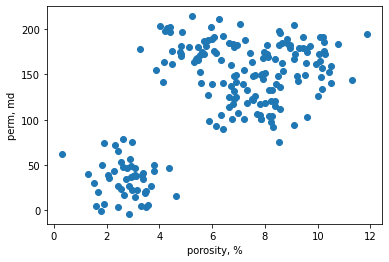

In [2]:
# visualizing the data

plt.scatter(xc[:,0],xc[:,1])
plt.xlabel('porosity, %')
plt.ylabel('perm, md')

Text(0, 0.5, 'perm, md')

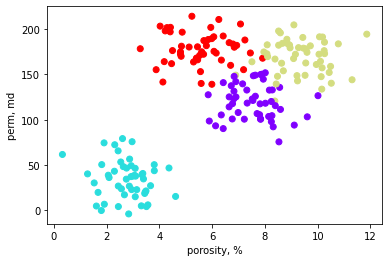

In [3]:
# true labels
plt.scatter(xc[:,0],xc[:,1],c=xc[:,2],cmap='rainbow')
plt.xlabel('porosity, %')
plt.ylabel('perm, md')

### Perform Clustering on Por - Perm Data

In [4]:
# task 1: generate cluster numbers (group numbers) using unsupervised learning (KMeans) 
# task 2: compare cluster numbers with classes/labels (identified by expert)

from sklearn.cluster import KMeans # function/classifier type from the machine learning library Sklearn

In [5]:
kmeans = KMeans(n_clusters=4, n_init=30, random_state=42)  #Number of time the k-means algorithm will be run with different centroid seeds

kmeans.fit(xc[:,0:2]) # provide all the samples and their two features to the model

KMeans(n_clusters=4, n_init=30, random_state=42)

In [6]:
kmeans.cluster_centers_  # this was computed after the model was given the data, therefore underscore centers_

array([[  7.19964047, 183.03635791],
       [  2.79340729,  30.82048409],
       [  7.01245206, 104.24532814],
       [  7.82966028, 146.97107323]])

In [7]:
kmeans.labels_ #cluster number or group numbers

array([0, 3, 3, 0, 0, 1, 0, 2, 0, 3, 0, 2, 0, 3, 0, 2, 3, 2, 1, 0, 1, 2,
       3, 1, 3, 1, 1, 2, 0, 3, 0, 1, 3, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0,
       3, 0, 0, 3, 1, 3, 2, 0, 3, 2, 1, 3, 3, 2, 3, 0, 1, 0, 1, 0, 0, 2,
       1, 3, 0, 1, 0, 3, 1, 3, 1, 3, 0, 2, 0, 3, 3, 1, 0, 1, 2, 2, 2, 0,
       3, 2, 1, 1, 2, 3, 3, 1, 0, 0, 1, 3, 3, 1, 3, 2, 3, 3, 1, 0, 1, 1,
       3, 0, 0, 0, 1, 3, 0, 0, 0, 0, 3, 3, 2, 0, 2, 3, 0, 2, 1, 0, 0, 0,
       2, 1, 1, 0, 3, 3, 0, 2, 1, 3, 1, 0, 0, 3, 3, 1, 0, 0, 0, 0, 2, 3,
       2, 0, 3, 0, 0, 2, 0, 2, 3, 3, 1, 3, 2, 0, 0, 2, 0, 2, 0, 0, 3, 3,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 0, 0, 0, 1, 3, 0, 0,
       1, 2])

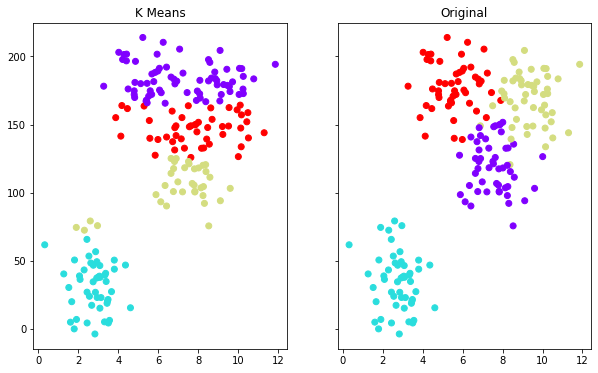

In [8]:
f, (ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax2.set_title('Original')
ax1.scatter(xc[:,0],xc[:,1],c=kmeans.labels_,cmap='rainbow') # groups found by KMeans
ax2.scatter(xc[:,0],xc[:,1],c=xc[:,2],cmap='rainbow') # labels identified by expert

#### Does KMeans perform well? What went wrong?


In [9]:
from sklearn.metrics import adjusted_rand_score # accounts for relabeling between ground truth and clustered labels

adjusted_rand_score(xc[:,2],kmeans.labels_)

0.48404245397399787

#### Features Need to be Scaled

In [10]:
print(xc[:,0].mean(),xc[:,1].mean(),xc[:,0].std(),xc[:,1].std()) 
# for columns of porosity and perm
# does it require scaling

6.303717677874798 125.18865324834412 2.607088522310069 59.98526999497343


In [11]:
from sklearn.preprocessing import StandardScaler # from preprocessing module
scaler = StandardScaler()
scaler.fit(xc[:,:2]) # being unsupervised only X is passed
xc_s=scaler.transform(xc[:,:2])

Text(0, 0.5, 'scaled perm')

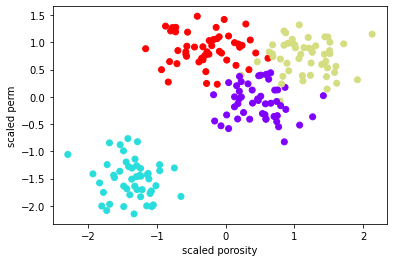

In [12]:
# plot of scaled data
plt.scatter(xc_s[:,0],xc_s[:,1],c=xc[:,2],cmap='rainbow')
plt.xlabel('scaled porosity')
plt.ylabel('scaled perm')

In [13]:
kmeans = KMeans(n_clusters=4) #set parameters # what happens with 3 clusters
#kmeans = KMeans(n_clusters=4,n_init=10,max_iter=200, tol=1e-5) #instantiate the model and set its parameters

In [14]:
kmeans.fit(xc_s) # provide all the samples and their two features to the model

KMeans(n_clusters=4)

In [15]:
kmeans.cluster_centers_  # this was computed after the model was given the data, therefore underscore centers_

array([[-1.35723311, -1.51365173],
       [ 1.18632357,  0.7515178 ],
       [-0.33434779,  0.9060613 ],
       [ 0.45657816, -0.05128374]])

In [16]:
kmeans.labels_ #cluster number or group numbers

array([2, 1, 3, 1, 1, 0, 1, 3, 1, 3, 2, 3, 1, 1, 2, 3, 1, 3, 0, 2, 0, 3,
       3, 0, 2, 0, 0, 3, 1, 1, 2, 0, 1, 3, 3, 2, 0, 0, 0, 3, 0, 2, 2, 2,
       3, 1, 2, 3, 0, 3, 3, 2, 1, 3, 0, 2, 3, 3, 2, 1, 0, 1, 0, 2, 1, 3,
       0, 1, 1, 0, 1, 3, 0, 3, 0, 1, 1, 3, 2, 3, 3, 0, 1, 0, 3, 3, 3, 2,
       3, 0, 0, 0, 0, 3, 3, 0, 1, 2, 0, 1, 3, 0, 3, 3, 3, 3, 0, 1, 0, 0,
       1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1, 2, 3, 0, 2, 2, 2,
       3, 0, 0, 2, 1, 2, 1, 3, 0, 1, 0, 2, 2, 1, 3, 0, 2, 2, 2, 2, 3, 1,
       3, 2, 1, 1, 1, 3, 1, 3, 3, 2, 0, 2, 3, 1, 2, 3, 1, 3, 2, 1, 3, 2,
       1, 1, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 1, 1, 2, 0, 3, 1, 1,
       0, 3])

In [17]:
xci = scaler.inverse_transform(xc_s)

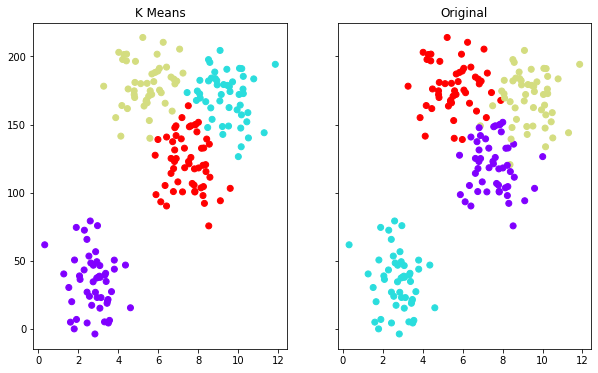

In [18]:
f, (ax1,ax2)=plt.subplots(1,2,sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax2.set_title('Original')
ax1.scatter(xci[:,0],xci[:,1],c=kmeans.labels_,cmap='rainbow') # groups found by KMeans
ax2.scatter(xc[:,0],xc[:,1],c=xc[:,2],cmap='rainbow') # labels identified by expert

Good metric for clustering

In [19]:
from sklearn.metrics import adjusted_rand_score # accounts for relabeling between ground truth and clustered labels #Rand Index is a function that computes a similarity measure between two clustering.

adjusted_rand_score(xc[:,2],kmeans.labels_)

0.8833404319346032

Bad metric for clustering

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score:', accuracy_score(xc[:,2],kmeans.labels_))
print(confusion_matrix(xc[:,2],kmeans.labels_))

Accuracy score: 0.01
[[ 0  1  0 49]
 [50  0  0  0]
 [ 0 46  0  4]
 [ 0  2 46  2]]


**Advantages of K-Means**

- Faster for small K and well-separated data

- Generates tighter clusters


**Disadvantages of K-Means**

- Fails for heavily overlapping data

- Fails if Euclidean distance does not represent the cluster separation

- Results depends on the cluster numbers

- Strong sensitivity to noise and outliers

- Fails for non globular dataset

- Quality of clusters cannot be compared


**Usage of K-Means**

- Video and image segmentation

- Determine locations of emergency care

# Finding the optimal number of clusters using elbow method

Most important question when using K-Means


(300, 2)

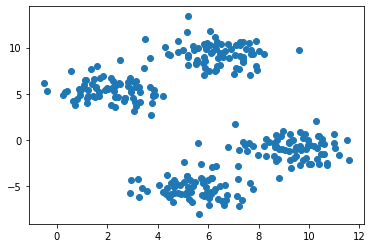

In [21]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4, cluster_std=1.2, random_state=13)
plt.scatter(X[:, 0], X[:, 1]);

X.shape

C:\Users\mibra\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


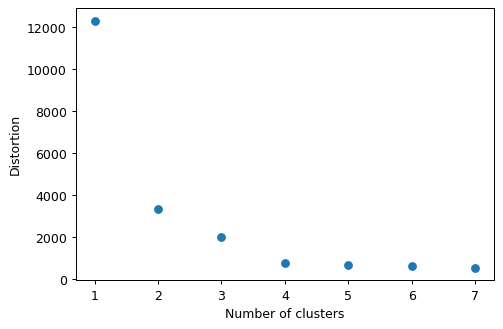

In [22]:
plt.rcParams['figure.dpi']=90

distortions = []
j =8
for i in range(1, j): #number of clusters
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_) #inertia # disortions 

plt.scatter(range(1, j), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# when you over cluster, intertia will be small.

# Inertia is an indication of dispersion in clusters.

# Sum of squared distances of samples to their closest cluster center.

- **Inertia** is how far away are the data points from cluster centers (on an average), more cluster centers lead to smaller inertia.



- The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum of squared criterion



- After 4 clusters, the distortion remains flat, this is a good indication of optimal number of clusters. 



- In high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.



# K-Means Applications to 64-Dimensional Digits Data

**Question.** Use K-Means to find cluster centers in image space (8by8) and test of the cluster centers are intiutive

- each pixel is between 0 to 16



- standard scalar will make the analysis of this dataset difficult because outliers in the outisde zones will affect the performance when using standard scalar

In [23]:
from  sklearn.datasets  import load_digits
digits = load_digits()

digits.data.shape
# 1797 samples
# 64 columns indicating the 64 pixels in the 8by8 image

(1797, 64)

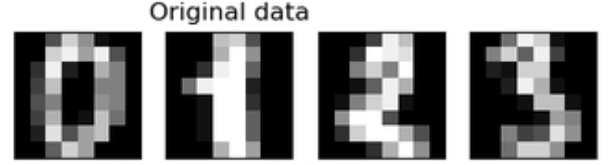

In [24]:
from sklearn.cluster import KMeans

i = 10 # no. of clusters to be generated

kmeans = KMeans(n_clusters=i)

clusters = kmeans.fit_predict(digits.data)

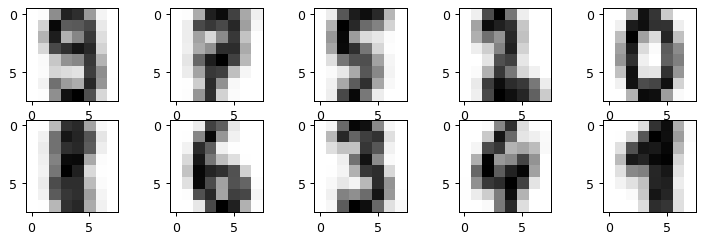

In [25]:
import matplotlib.pyplot as plt

# visualize the cluster centers
fig = plt.figure(figsize=(10, 3))


for i in range(i):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(kmeans.cluster_centers_[i].reshape((8, 8)),
              cmap=plt.cm.binary)

# there is no gaurantee that clusters are representative

KMeans is unsupervised and there is no constraint to ensure that the cluster centers correspond to true labels.

In [26]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(digits.target,clusters)

0.6689721361816536

### Type curve clustering example
Type curve clustering can be determined based on various factors such
as geologic features, production performance, BTU, etc. <br>

The current industry practice is using production performance knowledge and geologic domain expertise to define the type curve boundaries. While this might be an acceptable solution, using a clustering algorithm such as k-means could provide much deeper insights into type curve boundaries without human cognition bias. 

<br>
This data set contains 438 wells with their respective geological features. Although other features such as production performance could be added to this analysis, the goal of this clustering is solely using geologic features to cluster the data.<br>

This data set includes seven parameters including gamma ray, bulk density,
resistivity, water saturation, Phih (porosity*thickness), TOC (total organic
content), and TVD.

In [27]:
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import pylab as pl
import numpy as np
%matplotlib inline

In [28]:
df = pd.read_excel('Chapter4_Geologic_DataSet.xlsx')
df.head()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TOC, fraction","TVD, ft"
0,118,2.2096,23,0.13,23,0.077,10670
1,170,2.2185,21,0.17,20,0.073,9932
2,166,2.2260,14,0.20,21,0.070,9747
3,166,2.2260,14,0.20,21,0.070,9747
4,135,2.2303,22,0.16,24,0.068,9222


Let's visualize the distribution of each parameter individualy.

C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GR_API', ylabel='Density'>

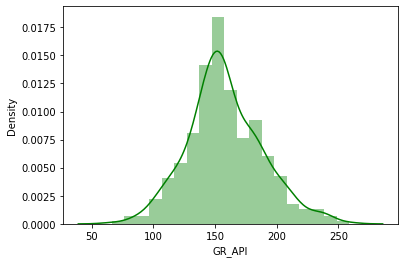

In [29]:
sns.distplot(df['GR_API'],label='Clustering Data',norm_hist=True, color='g')

C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bulk Density, gcc', ylabel='Density'>

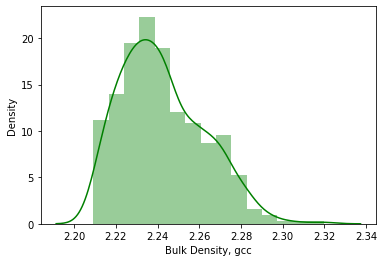

In [30]:
sns.distplot(df['Bulk Density, gcc'],label='Clustering Data',norm_hist=True, color='g')

C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Resistivity, ohm-m', ylabel='Density'>

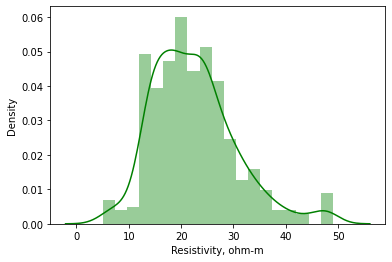

In [31]:
sns.distplot(df['Resistivity, ohm-m'],label='Clustering Data',norm_hist=True, color='g')

C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Water Saturation, fraction', ylabel='Density'>

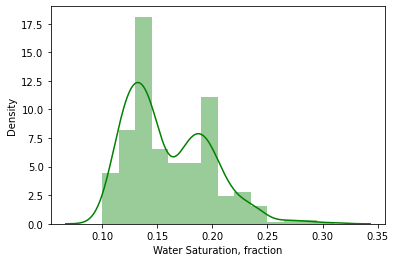

In [32]:
sns.distplot(df['Water Saturation, fraction'],label='Clustering Data',norm_hist=True, color='g')

C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PhiH, ft', ylabel='Density'>

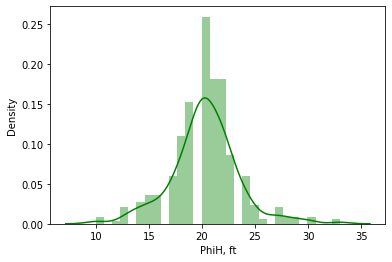

In [33]:
sns.distplot(df['PhiH, ft'],label='Clustering Data',norm_hist=True, color='g')

C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TOC, fraction', ylabel='Density'>

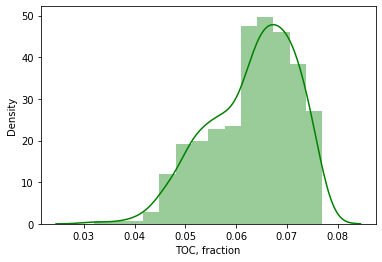

In [34]:
sns.distplot(df['TOC, fraction'],label='Clustering Data',norm_hist=True, color='g')

C:\Users\mibra\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TVD, ft', ylabel='Density'>

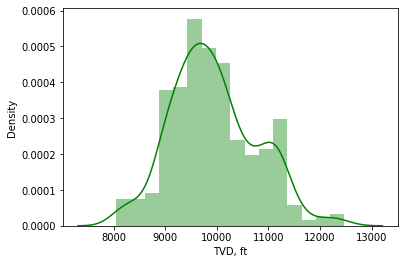

In [35]:
sns.distplot(df['TVD, ft'],label='Clustering Data',norm_hist=True, color='g')

Let’s plot a heat map of all parameters versus one another to find
potential collinear features.

<AxesSubplot:>

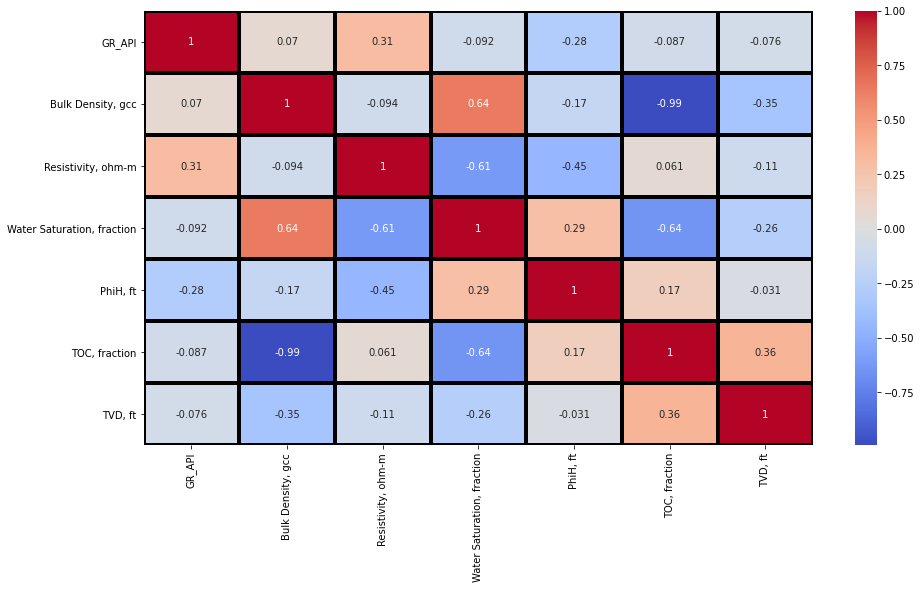

In [36]:
fig=plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidths=4, linecolor='black')

TOC and bulk density have a negative Pearson correlation coefficient of -0.99. This makes sense as TOC is a calculated feature derived from bulk density. Therefore, let’s  remove TOC from the analysis because TOC and bulk density would provide the same information when clustering.

In [37]:
df.drop(['TOC, fraction'], axis=1, inplace=True) #Please remember to use "inplace = True" when the desired column removal outcome is intended to be permanent.

In [38]:
df

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
0,118,2.2096,23,0.13,23,10670
1,170,2.2185,21,0.17,20,9932
2,166,2.2260,14,0.20,21,9747
3,166,2.2260,14,0.20,21,9747
4,135,2.2303,22,0.16,24,9222
...,...,...,...,...,...,...
433,123,2.2307,24,0.14,22,9605
434,141,2.2598,20,0.20,19,10086
435,157,2.2616,20,0.17,18,9008
436,142,2.2523,14,0.21,22,10397


Next, let’s import the StandardScaler library and standardize the data prior
to feeding the data into the k-means algorithm

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_scaled=scaler.fit(df)
df_scaled=scaler.transform(df)
df_scaled

array([[-1.31654221, -1.63691997,  0.07053355, -0.79799783,  0.85324677,
         0.88856422],
       [ 0.39613573, -1.19092098, -0.18063471,  0.27088   , -0.08890975,
        -0.00377924],
       [ 0.26439127, -0.81507913, -1.05972362,  1.07253837,  0.22514243,
        -0.22746968],
       ...,
       [-0.03203375,  0.96891686, -0.30621884,  0.27088   , -0.7170141 ,
        -1.12102229],
       [-0.52607547,  0.50287296, -1.05972362,  1.33975783,  0.5391946 ,
         0.55846969],
       [-0.32845878, -0.45928217, -0.43180297,  0.27088   ,  1.16729895,
        -0.65913177]])

Next, let’s import the k-means library and write a for loop for calculating
within cluster sum of squared errors.

In [40]:
import matplotlib.pyplot as plt
distortions=[]
for i in range (1,21):
    km=KMeans(n_clusters=i,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
    km.fit(df_scaled)
    distortions.append(km.inertia_) #append inertia results to distortions


C:\Users\mibra\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


The term "init" refers to a method for initialization that can be set to "random" that will randomly initialize the centroids. <br>

More desirable approach that was used in this example is called
"k-means++" which, according to the scikit library definition, refers to
selecting the initial cluster centers in an intelligent way to speed up convergence.<br>

Using "k-means++" initializes the centroids to be far from one
another which could potentially lead to better results than random initialization. <br>

"max_iter" refers to the maximum number of iterations for a single run.

---

let’s use the matplotlib library
to plot number of clusters on the x-axis versus within cluster sum of squared
errors

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

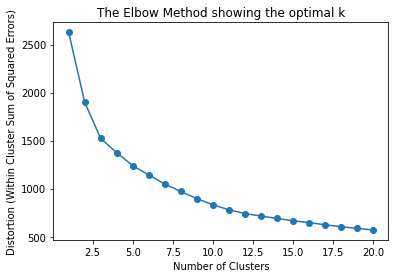

In [41]:
plt.plot(range(1,21),distortions, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Within Cluster Sum of Squared Errors)')
plt.title('The Elbow Method showing the optimal k')

Elbow technique is to find the number of desired clusters to choose. <br>
Therefore, from the elbow point, 10 clusters were chosen.
Please note that 10 clusters is not an exact solution and more or less clusters could be selected to see the cluster distribution across these wells as a function of number of
clusters.

In [42]:
n=10
# Initializing KMeans
kmeans = KMeans(n_clusters=n,random_state=1000,init='k-means++', n_init=1000, max_iter=500)
# Fitting with inputs 
kmeans = kmeans.fit(df_scaled) #df_scaled is the standardized data.

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_) #is used to obtain the cluster centroids for each of the 10 clusters and 6 geologic features.

#Note that these centroids are the standardized version and it must be converted back to its original form using an inverse transform to make sense.

[[ 0.87076866 -0.97883879  0.38000873 -0.77891073  0.23635858  0.60510785]
 [-0.43702597  0.55465562 -0.72948387  0.94387715  2.20250797 -0.35747435]
 [ 0.29039347  0.14795517  1.23604241 -0.59641123 -0.70048503 -0.74714425]
 [-0.95362352 -0.86282759 -0.28015421 -0.74253719 -0.01187808  1.51891269]
 [-0.11678936 -0.20043572 -0.82697437  0.63429846  0.19583089 -0.31751012]
 [ 1.49714297  1.42135886  2.61809734 -0.89343335 -2.06295198 -0.64341298]
 [ 0.93027358  1.88836765 -0.92867931  2.10656149  0.29341464 -0.76343302]
 [-0.81376234 -0.84668052  0.35502005 -0.76527708  0.34691776 -0.3705674 ]
 [-0.63019609  1.182783   -0.5776426   0.96478859 -0.16489011 -0.19384786]
 [ 1.92616794 -0.13674153  0.3616604  -0.65224177 -1.43076904  0.83668123]]


In [43]:
labels=kmeans.labels_ #obtain the labels for each well.
labels

array([3, 4, 4, 4, 7, 1, 5, 7, 0, 0, 8, 1, 8, 8, 0, 2, 3, 8, 3, 2, 2, 7,
       3, 9, 2, 4, 1, 4, 3, 4, 6, 8, 0, 8, 4, 6, 2, 0, 7, 1, 1, 8, 8, 4,
       2, 1, 9, 2, 3, 8, 2, 2, 7, 7, 7, 9, 3, 7, 0, 8, 4, 7, 3, 1, 4, 0,
       3, 5, 5, 0, 4, 4, 3, 7, 9, 5, 3, 8, 6, 2, 1, 4, 0, 0, 0, 3, 1, 8,
       2, 7, 2, 5, 3, 0, 0, 8, 8, 8, 8, 8, 1, 0, 0, 7, 4, 1, 7, 7, 6, 1,
       1, 9, 7, 7, 7, 2, 3, 9, 0, 2, 1, 8, 4, 0, 4, 2, 4, 2, 2, 0, 7, 2,
       1, 4, 2, 7, 8, 2, 3, 9, 3, 9, 6, 7, 4, 4, 3, 2, 1, 7, 8, 3, 8, 1,
       9, 7, 2, 3, 4, 2, 6, 0, 3, 2, 5, 4, 6, 1, 3, 2, 7, 4, 2, 8, 8, 4,
       3, 7, 3, 0, 3, 7, 6, 2, 8, 1, 1, 8, 4, 4, 8, 4, 3, 7, 4, 6, 6, 9,
       3, 5, 3, 5, 7, 0, 2, 2, 3, 3, 0, 3, 2, 2, 6, 7, 8, 4, 4, 8, 4, 2,
       8, 8, 8, 8, 1, 2, 2, 5, 6, 6, 6, 7, 0, 0, 3, 0, 4, 3, 4, 4, 2, 0,
       2, 5, 2, 6, 4, 4, 8, 4, 3, 9, 5, 2, 0, 0, 8, 4, 4, 8, 4, 4, 4, 4,
       8, 8, 0, 7, 0, 7, 2, 4, 4, 8, 4, 1, 3, 9, 7, 3, 4, 3, 4, 6, 2, 8,
       8, 1, 6, 1, 3, 3, 2, 9, 7, 0, 4, 4, 2, 2, 2,

Another library to plot the elbow and silhouette is called KElbowVisualizer

In [ ]:
#! pip install yellowbrick
#!pip uninstall scikit-learn -y
#!pip3 install scikit-learn

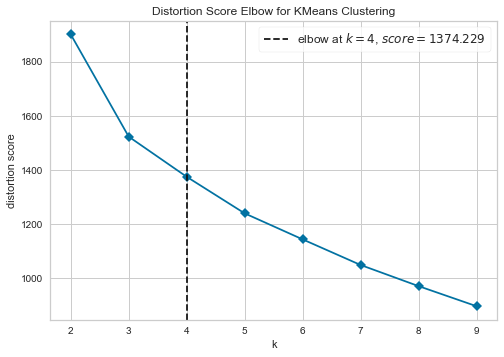

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
from yellowbrick.cluster import KElbowVisualizer
visulaizer=KElbowVisualizer(kmeans, k=(2,10), timings=False)

visulaizer.fit(df_scaled)
visulaizer.show()

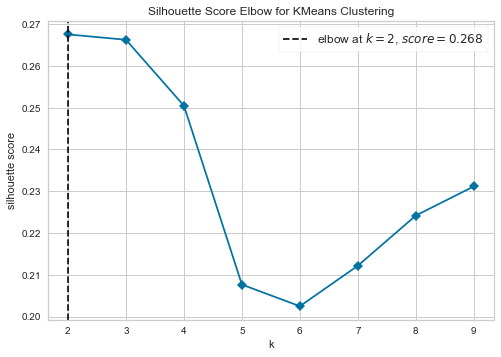

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [49]:
from yellowbrick.cluster import KElbowVisualizer
visulaizer=KElbowVisualizer(kmeans, k=(2,10), metric='silhouette',timings=False)

visulaizer.fit(df_scaled)
visulaizer.show()

let’s convert "df_scaled" from an array to a data frame and add the labeled clusters per well to that data frame

In [50]:
df_scaled= pd.DataFrame(df_scaled,columns=df.columns[0:6])
df_scaled['Clusters']=labels 

In [51]:
df_scaled

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft",Clusters
0,-1.316542,-1.636920,0.070534,-0.797998,0.853247,0.888564,3
1,0.396136,-1.190921,-0.180635,0.270880,-0.088910,-0.003779,4
2,0.264391,-0.815079,-1.059724,1.072538,0.225142,-0.227470,4
3,0.264391,-0.815079,-1.059724,1.072538,0.225142,-0.227470,4
4,-0.756628,-0.599596,-0.055051,0.003661,1.167299,-0.862267,7
...,...,...,...,...,...,...,...
433,-1.151862,-0.579552,0.196118,-0.530778,0.539195,-0.399167,7
434,-0.559012,0.878715,-0.306219,1.072538,-0.402962,0.182428,8
435,-0.032034,0.968917,-0.306219,0.270880,-0.717014,-1.121022,8
436,-0.526075,0.502873,-1.059724,1.339758,0.539195,0.558470,8


Text(0.5, 0, 'silhouette coefficient')

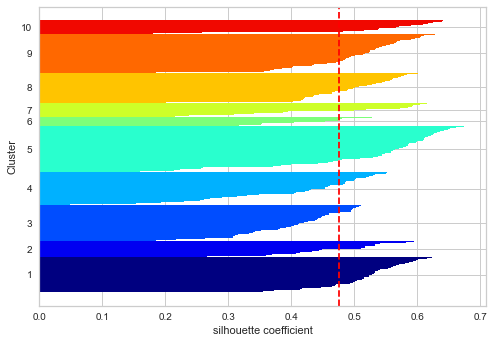

In [52]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
cluster_labels=np.unique(labels)
n_clusters=cluster_labels.shape[0]
silhouette_vals=silhouette_samples(df_scaled,labels,metric='euclidean')
y_ax_lower, y_ax_upper=0,0
yticks=[]
for i, c in enumerate (cluster_labels):
    c_silhouette_vals= silhouette_vals[labels==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color= cm.jet(float(i)/n_clusters)
    plt.barh(range(y_ax_lower,y_ax_upper),c_silhouette_vals,height=1,edgecolor='none',color=color)
    yticks.append((y_ax_lower+y_ax_upper)/2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg=np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels +1)
plt.ylabel('Cluster')
plt.xlabel('silhouette coefficient')
# plt.show()

let’s return the data to its original (unstandardized form) by multiplying
each variable by the standard deviation of that variable and adding the
mean of that variable

In [53]:
df_scaled['GR_API']=(df_scaled['GR_API']*(df['GR_API'].std())+df['GR_API'].mean())
df_scaled['Bulk Density, gcc']=(df_scaled['Bulk Density, gcc']*(df['Bulk Density, gcc'].std())+df['Bulk Density, gcc'].mean())
df_scaled['Resistivity, ohm-m']=(df_scaled['Resistivity, ohm-m']*(df['Resistivity, ohm-m'].std())+df['Resistivity, ohm-m'].mean())
df_scaled['Water Saturation, fraction']=(df_scaled['Water Saturation, fraction']*(df['Water Saturation, fraction'].std())+df['Water Saturation, fraction'].mean())
df_scaled['PhiH, ft']=(df_scaled['PhiH, ft']*(df['PhiH, ft'].std())+df['PhiH, ft'].mean())
df_scaled['TVD, ft']=(df_scaled['TVD, ft']*(df['TVD, ft'].std())+df['TVD, ft'].mean())

Note that "scaler.inverse_transform()"
in scikit-learn could have also been used to transform the data back to
its original form.

To obtain a comprehensible version of the cluster centroids, let’s groupby
"clusters" and take the mean of each cluster as

In [54]:
Group_by=df_scaled.groupby(by='Clusters').mean()
Group_by

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
Clusters,,,,,,
0,184.440947,2.222710,25.467746,0.130681,21.036575,10436.143694
1,144.688531,2.253346,16.622987,0.195226,27.304316,9639.143409
2,166.799556,2.245221,32.291957,0.137518,18.050081,9316.503934
3,128.985759,2.225027,20.204996,0.132044,20.245240,11192.757228
4,154.422612,2.238261,15.845803,0.183627,20.907380,9672.233056
5,203.480551,2.270661,43.309553,0.126390,13.706774,9402.391509
6,186.249690,2.279991,15.035022,0.238786,21.218460,9303.017133
7,133.237053,2.225350,25.268539,0.131192,21.389018,9628.302607
8,138.816830,2.265895,17.833450,0.196009,19.757464,9774.623125


each cluster centroid represents the average of
each feature’s average. For example, cluster 3 (since indexing starts with 0)
has an average GR of 154.422 API, a bulk density of 2.238 g/cc, a resistivity of
15.845 U-m, a water saturation of 18.3627%, a Phi*H of 20.907 ft, and a TVD
of 9672.233 ft.

understand the number of counts per each cluster.

In [55]:
df_scaled.groupby(by='Clusters').count()

,GR_API,"Bulk Density, gcc","Resistivity, ohm-m","Water Saturation, fraction","PhiH, ft","TVD, ft"
Clusters,,,,,,
0,56,56,56,56,56,56
1,27,27,27,27,27,27
2,57,57,57,57,57,57
3,53,53,53,53,53,53
4,75,75,75,75,75,75
5,14,14,14,14,14,14
6,23,23,23,23,23,23
7,49,49,49,49,49,49
8,62,62,62,62,62,62


In [56]:
df_scaled.to_csv('KM.csv')